# PySpark SQL - General Overview

![](https://miro.medium.com/max/600/1*5C4UQznqEiN3D6Xutlgwlg.png)

In [ ]:
!pip install pyspark

     |████████████████████████████████| 281.3 MB 39 kB/s 
     |████████████████████████████████| 198 kB 42.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=faa02f06adf85e57b597afa0b747b9eaf8e5a6664564a07750a5938c2139773e
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max, struct
import matplotlib.pyplot as plt

In [ ]:
spark= SparkSession.builder.appName('Spark_app').getOrCreate()

In [ ]:
listening_df = spark.read.csv('/content/drive/MyDrive/dataset/listenings.csv', header=True, inferSchema=True)

In [ ]:
listening_df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

In [ ]:
listening_df= listening_df.drop('date')

In [ ]:
listening_df= listening_df.na.drop()

In [ ]:
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

In [ ]:
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



In [ ]:
shape= (listening_df.count(), len(listening_df.columns))

print(shape)

(13758905, 4)


In [ ]:
listening_df.select('track','artist').show()

+--------------------+---------------+
|               track|         artist|
+--------------------+---------------+
|           Price Tag|       Jessie J|
|Price Tag (Acoust...|       Jessie J|
|Be Mine! (Ballad ...|          Robyn|
|            Acapella|          Kelis|
|   I'm Not Invisible|      The Tease|
|Bounce (Feat NORE...|       MSTRKRFT|
|Don't Stop The Mu...|        Rihanna|
|               ObZen|      Meshuggah|
|   Yama's Messengers|         Gojira|
|On the Brink of E...|   Napalm Death|
|On the Brink of E...|   Napalm Death|
|        In Deference|   Napalm Death|
|      Post(?)organic|    Decapitated|
|        Mind Feeders|   Dom & Roland|
|Necrosadistic War...|Cannibal Corpse|
|     Dance All Night|   Dom & Roland|
|          Late Night|   Dom & Roland|
|          Freak Seen|   Dom & Roland|
|Paradrenasite (Hi...|   Dom & Roland|
|               Rhino|   Dom & Roland|
+--------------------+---------------+
only showing top 20 rows



###  All of the records of those users who have listened to ***Rihanna***

In [ ]:
listening_df.select('*').where(listening_df['artist']=='Rihanna').show()

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
|      0rdos|There's a Thug in...|Rihanna|    Music of the Sun|
|      0rdos|                Rush|Rihanna|    Music of the Sun|
|      0rdos|              Let Me|Rihann

In [ ]:
# or

listening_df.select('*').filter(listening_df['artist']=='Rihanna').show()

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
|      0rdos|There's a Thug in...|Rihanna|    Music of the Sun|
|      0rdos|                Rush|Rihanna|    Music of the Sun|
|      0rdos|              Let Me|Rihann

### Top 10 users who are fan of ***Rihanna***

In [ ]:
listening_df.select('user_id').filter(listening_df['artist']=='Rihanna').groupby('user_id').agg(count('user_id').alias('number_of_time'))\
.orderBy(desc('number_of_time')).show(10)

# or we can put limit() at the end to limit number of output

+---------------+--------------+
|        user_id|number_of_time|
+---------------+--------------+
|        thiessu|           179|
|    eyessetkyle|           166|
|           adxx|           164|
|missnumberthree|           156|
|helloiamnatalie|           128|
|          nmjnb|           124|
|        AndyyyA|           123|
|     BIGBANG186|           121|
|     mixedvibes|           120|
|       AndyKitt|           115|
+---------------+--------------+
only showing top 10 rows



### Top 10 famous tracks 

In [ ]:
listening_df.select('track').groupby('track').agg(count('track').alias('track_play_number')).orderBy(desc('track_play_number')).show(10)

+-------+-----------------+
|  track|track_play_number|
+-------+-----------------+
|  Intro|            13176|
|   Home|             7576|
|  Hello|             6961|
|Hold On|             5857|
|   Work|             4889|
|  Sorry|             4824|
|   Baby|             4646|
|Runaway|             4429|
| Closer|             4287|
|   Fire|             4141|
+-------+-----------------+
only showing top 10 rows



In [ ]:
# or by using both artist and track

listening_df.select('track','artist').groupby('track','artist').agg(count('*').alias('count')).orderBy(desc('count')).show(10)

+----------------+--------------+-----+
|           track|        artist|count|
+----------------+--------------+-----+
|           Sorry| Justin Bieber| 3381|
|Do I Wanna Know?|Arctic Monkeys| 2865|
|     Skinny Love|      Bon Iver| 2836|
|      PILLOWTALK|          Zayn| 2701|
|   Mr Brightside|   The Killers| 2690|
|            Work|       Rihanna| 2646|
|         Pompeii|      Bastille| 2606|
| Little Lion Man|Mumford & Sons| 2520|
|        The Cave|Mumford & Sons| 2485|
|   Love Yourself| Justin Bieber| 2481|
+----------------+--------------+-----+
only showing top 10 rows



### Top 10 famous tracks of ***Rihanna*** 

In [ ]:
listening_df.select('artist', 'track').filter(listening_df['artist']=='Rihanna').groupby('track').agg(count('track').alias('count')).orderBy(desc('count')).show(10)

+--------------------+-----+
|               track|count|
+--------------------+-----+
|                Work| 2646|
|Only Girl (In the...| 1749|
|We Found Love (fe...| 1575|
|                 S&M| 1307|
|            Rude Boy| 1303|
|            Diamonds| 1224|
|      Kiss it Better|  945|
| Where Have You Been|  844|
|Cheers (Drink to ...|  697|
|           Needed Me|  679|
+--------------------+-----+
only showing top 10 rows



### Top 10 famous albums 

In [ ]:
listening_df.select('artist','album').groupby('album','artist').agg(count('*').alias('count')).orderBy(desc('count')).show(10)

+--------------------+--------------------+-----+
|               album|              artist|count|
+--------------------+--------------------+-----+
|   The Life Of Pablo|          Kanye West|22310|
|                  xx|              The xx|14195|
|                  AM|      Arctic Monkeys|14090|
|     An Awesome Wave|               alt-J|13635|
|        Sigh No More|      Mumford & Sons|13543|
|Whatever People S...|      Arctic Monkeys|12731|
|            For Emma|            Bon Iver|11994|
|          Art Angels|              Grimes|11655|
|               Lungs|Florence + the Ma...|11362|
|                  21|               Adele|11215|
+--------------------+--------------------+-----+
only showing top 10 rows



In [ ]:
genre_df= spark.read.csv('/content/drive/MyDrive/dataset/genre.csv', header=True, inferSchema=True)

In [ ]:
genre_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



In [ ]:
shape= (genre_df.count(), len(genre_df.columns))

print(shape)

(138432, 2)


In [ ]:
data = listening_df.join(genre_df, how='inner', on='artist')
data.show()

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|       Ro

### Top 10 users who are fan of ***pop*** music

In [ ]:
data.select('user_id','genre').filter(data['genre']=='pop').groupby('user_id','genre')\
.agg(count('genre').alias('pop_count')).orderBy(desc('pop_count')).show(10)

+---------------+-----+---------+
|        user_id|genre|pop_count|
+---------------+-----+---------+
|        01Green|  pop|      496|
|      momousagi|  pop|      400|
|          mrpsb|  pop|      400|
|   BlueKnockOut|  pop|      378|
|    musicboy80s|  pop|      376|
|  incultojurgis|  pop|      374|
| ElektricOrchid|  pop|      370|
|foreign_fanatic|  pop|      350|
|   Kevin_Soutar|  pop|      346|
|  landrover2171|  pop|      301|
+---------------+-----+---------+
only showing top 10 rows



### Top 10 famous genres

In [ ]:
data.select('genre').groupby('genre').agg(count('genre')\
.alias('genre_count')).orderBy(desc('genre_count')).show(10)

+----------+-----------+
|     genre|genre_count|
+----------+-----------+
|      rock|    2691934|
|       pop|    1544747|
|electronic|     551509|
|   hip hop|     532984|
|      folk|     438174|
|indie rock|     431439|
|      punk|     380915|
|       r&b|     344101|
|     metal|     208107|
|     indie|     206726|
+----------+-----------+
only showing top 10 rows



### Find out each user favourite genre

In [ ]:
part1 = data.select('user_id', 'genre').groupby('user_id','genre').agg(count('*').alias('count')).orderBy('user_id')
part1.show()

+-------+--------------------+-----+
|user_id|               genre|count|
+-------+--------------------+-----+
| --Seph|               Bjorn|    8|
| --Seph| brazilian pop music|    1|
| --Seph| Snoop Dogg & Dev...|    4|
| --Seph|        instrumental|    1|
| --Seph|   Vladimir Spivakov|    1|
| --Seph|               samba|    2|
| --Seph|             ambient|    6|
| --Seph| Sara Mingardo & ...|    1|
| --Seph|             baroque|    1|
| --Seph|     Hilko Schomerus|    1|
| --Seph|      Kendrick Lamar|    4|
| --Seph|             hip hop|    7|
| --Seph|          electronic|    6|
| --Seph|                rock|   27|
| --Seph| London Symphony ...|    1|
| --Seph|                fado|    1|
| --Seph|          soundtrack|    1|
| --Seph|              techno|    3|
| --Seph|          french pop|    1|
| --Seph|      Alice Sara Ott|    2|
+-------+--------------------+-----+
only showing top 20 rows



In [ ]:
part2 = part1.groupby('user_id').agg(max(struct(col('count'),col('genre'))).alias('max'))\
.select(col('user_id'),col('max.genre'))
part2.show()

+---------------+-----------+
|        user_id|      genre|
+---------------+-----------+
|      --Shinn--|       rock|
|       --ollz--|       rock|
|     -Amnesiac-|      metal|
|         -Bish-|       rock|
|        -Danni-|       rock|
|          -DeWp|    hip hop|
|      -Faction-|       rock|
|-February-Star-|       rock|
|        -Gemma-|british pop|
|   -Gingergirl-|        pop|
|        -Hazel-|   synthpop|
|        -Heiko-| electronic|
|         -Katie|      lo-fi|
|      -Krystal-|       rock|
|         -Mark-| indie rock|
|       -Mullet-|  metalcore|
|          -Robs|       rock|
| -SleepingStar-|black metal|
|      -Stifler-|       rock|
|  -Toxic-Waste-|  aggrotech|
+---------------+-----------+
only showing top 20 rows



### How many pop,rock,metal and hip hop singers we have and then visulize it using bar chart 

In [ ]:
genre_count = genre_df.select('genre').filter((col('genre')=='pop') |\
(col('genre')=='rock') | (col('genre')=='metal') | (col('genre')=='hip hop'))\
.groupBy('genre').agg(count('genre').alias('genre_count')).orderBy(desc('genre_count'))

genre_count.show()

+-------+-----------+
|  genre|genre_count|
+-------+-----------+
|   rock|       9066|
|    pop|       6960|
|hip hop|       4288|
|  metal|       1854|
+-------+-----------+



In [ ]:
genre_list = genre_count.collect()
genre_list

[Row(genre='rock', genre_count=9066),
 Row(genre='pop', genre_count=6960),
 Row(genre='hip hop', genre_count=4288),
 Row(genre='metal', genre_count=1854)]

In [ ]:
labels = [row['genre'] for row in genre_list]
values= [row['genre_count'] for row in genre_list]

In [ ]:
print(labels)
print(values)

['rock', 'pop', 'hip hop', 'metal']
[9066, 6960, 4288, 1854]


now lets visualize these two lists using a bar chart

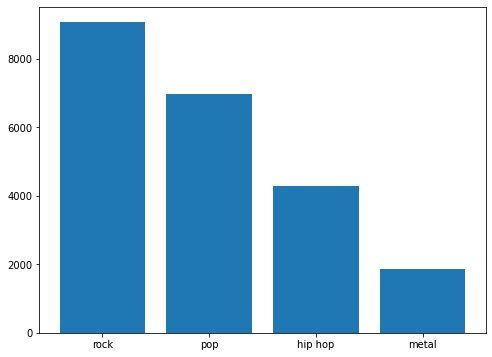

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(labels,values);